# Decision Tree를 이용한 Classifier

## 목차 
    0. 필요 라이브러리
    1. Data set
        1-1 Data 확인
        1-2 Data set trian/test 분류
    2. Deicision Tree 
        2-1 Decision Tree 학습
        2-2 Decision Tree 결과
        2-3 Decision Tree 시각화 및 결과 해석
    3. 추가
        3-1 [모델 평가] Feature 중요도 확인
        3-2 [모델 평가] Confussion Matrix
        3-3 [모델 평가] Model Evaluation

# 0. 필요 라이브러리

In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as sm

# 1. Data set
## 1-1 Data 확인

In [2]:
df = pd.read_csv('data_week13.csv', encoding='utf-8', index_col=0)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
caseno,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


## 1-2 Data set trian/test 분류
* x : input Variable  
    (SepalLength, SepalWidth, PetalLength, PetalWidth)
            
            
* y : output Variable  
    (setosa, versicolor, virginica)
      
* test_size : 전체 데이터에서 [학습용:테스트용] 중 테스트데이터 비율 설정
* shuffle : 데이터 분리 전 섞는 횟수 
* random_state : 동일한 결과를 얻기 위해 특정 숫자 지정


In [3]:
header = []
for i in df:
    header.append(i)

# 데이터셋 분류
x = df[header[:-1]]  # x=input variable
y = df[header[-1]]  # y=output variable

# 데이터셋 학습용/테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    shuffle=42,
                                                    random_state=6)

# 2. Deicision Tree 
## 2-1 Decision Tree 학습
    

* criterion = "entropy" : entropy를 분류의 기준으로하여 무질서한 정도에 따라 분류한다.
* random_state : 동일한 결과를 얻기 위해 특정 숫자 지정  
* y_test : X_test의 실제 분류 값 
* model.predict(X_test) : Decision Tree로 분류 학습 후 X_test를 예측
* model.score(X_test, y_test)) : 위에서 예측한 X_test의 결과를 통해 실제 결과 값인 y_test와 계산하여 정확도 계산
    
      
*  max_depth : tree의 깊이 제한을 5로 설정    
트리에 가지가 많으면 필요없이 과도하게 나눠서 과적합이 생기기 쉽기 때문에   
결정트리의 특정 노드 밑의 하부 트리를 제거하여 일반화 성능을 높힌다.  
max_depth를 미리 설정하여 말단 노드의 개수나 결정트리의 depth길이를 5로 제한한다.  

In [15]:
DTC = tree.DecisionTreeClassifier(max_depth=5, random_state=6,criterion = "entropy")
model = DTC.fit(X_train, y_train)

## 2-2 Decision Tree 분류 결과

In [17]:
result_data = [list(y_test), list(model.predict(X_test))]
print('\n 테스트 정확도 :', model.score(X_test, y_test))
pd.DataFrame(result_data, index=['실제 분류', '분류 예측 결과']).transpose()


 테스트 정확도 : 0.9333333333333333


,실제 분류,분류 예측 결과
0,setosa,setosa
1,virginica,virginica
2,setosa,setosa
3,setosa,setosa
4,virginica,virginica
5,versicolor,versicolor
6,virginica,virginica
7,setosa,setosa
8,virginica,virginica
9,versicolor,versicolor


해당 Decision Tree의 정확도로 0.93을 달성했다.

## 2-3 Decision Tree Graph 시각화

[Text(418.5, 847.1100000000001, 'PetalWidth <= 0.8\nentropy = 1.585\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(279.0, 693.0900000000001, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(558.0, 693.0900000000001, 'PetalWidth <= 1.65\nentropy = 1.0\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(279.0, 539.0700000000002, 'PetalLength <= 5.45\nentropy = 0.191\nsamples = 34\nvalue = [0, 33, 1]\nclass = versicolor'),
 Text(139.5, 385.05000000000007, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = versicolor'),
 Text(418.5, 385.05000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(837.0, 539.0700000000002, 'PetalLength <= 5.05\nentropy = 0.31\nsamples = 36\nvalue = [0, 2, 34]\nclass = virginica'),
 Text(697.5, 385.05000000000007, 'SepalWidth <= 2.9\nentropy = 0.863\nsamples = 7\nvalue = [0, 2, 5]\nclass = virginica'),
 Text(558.0, 231.0300000000001, 'entropy = 0.0\nsamples = 4\nvalue = 

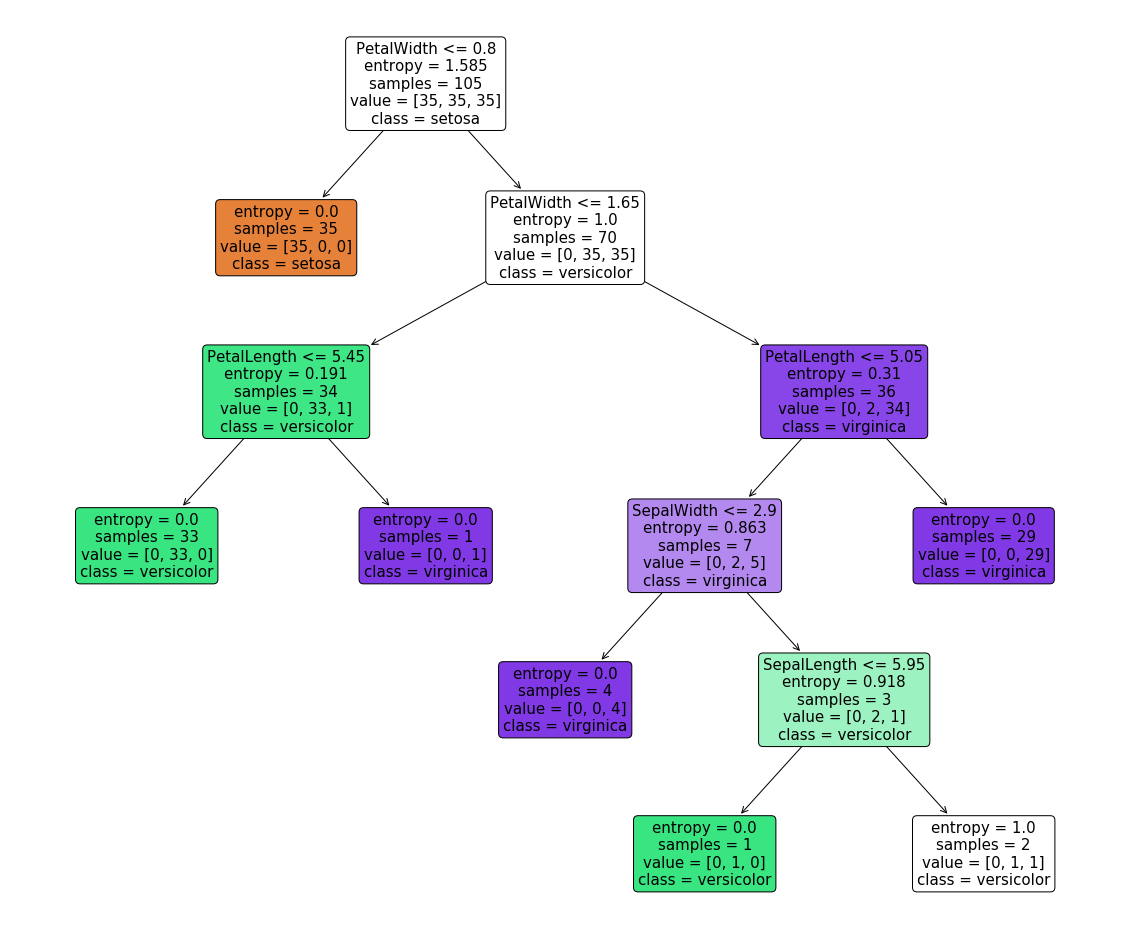

In [18]:
plt.figure(figsize=(20, 17))
tree.plot_tree(model,
               max_depth=5,
               feature_names=list(df.columns[:-1]),
               class_names=list(df[df.columns[-1]].unique()),
               filled=True,
               rounded=True,
               impurity =True,
               fontsize=15)

## 해석
Class에 따른 색 분류  
주황색 : setosa , 초록색 : versicolor , 보라색 : virginica   
    
   
각 노드의 맨 위 기준에 의해 True/False로 해당하는 값을 가진 data가 왼쪽(True), 오른쪽(False) 노드로 이동한다.   
이를 통해 각 기준에 맞게 분류를 진행한다.   
    
제일 맨 위 마디에서 'PetalWidth <= 0.8'을 기준으로 True/False에 의해 두 번째 마디가 생성되었다.   
이때, setosa는 entropy= 0이므로, 모두 분류했음을 확인할 수 있다.  
   
이처럼 entorpy의 값에 따라 서로 다른 class가 섞여있는 무질서(불확실성) 정도를 측정할 수 있으며,  
이 값이 높을수록 서로 다른 Class가 섞여 있음을 의미한다.   
Decision Tree는 이러한 Entropy를 낮추기 위해 분류한다.  
   
  
각 노드에서     
samples : 해당 마디의 data 개수이며,  
value 리스트는 해당 노드의 각 Class가 분류된 개수이다. [0 ,1 ,2 ]의 의미 : [setosa : 0개, versicolor : 1개, virginica: 2개]  
각 노드는 Class의 개수가 많은 것으로 색이 분류되며, 여러 Class가 섞여있을 경우에는 entropy 값이 높아진다.  
  
예를 들어, depth 4의 왼쪽 보라색 노드는 모든 클래스가 virginica 이어 entropy 값이 0이지만,  
오른쪽 연초록 노드에서는 versicolor:2개 vs virginica:1개 서로 다른 클래스가 한 노드에 있기 때문에 entropy 값이 0.918이 되었다.  
이처럼 entropy 값은 불확실성을 나타내주며 해당 노드에 여러 클래스가 함께 섞인 비율이 높을수록 높아진다.  

    
Entropy 값이 높을수록 밝은 색이 되며, entropy가 1인 경우 ( Root 노드, 오른쪽 맨 아래 Leaf 노드)는 하얀색으로 표시된다.   
가장 진한 주황색, 보라색, 초록색이 옳게 분류된 노드이며 이때의 Entropy는 0임을 확인할 수 있다.     
   
Depth =5를 통해 가지치기를 통해 과적합을 예방하였다.   
이를 통해 이 모델에서는 정확도가 0.933을 기록했다.  

# 3. 추가

## 3-1 [모델 평가] Feature 중요도 확인

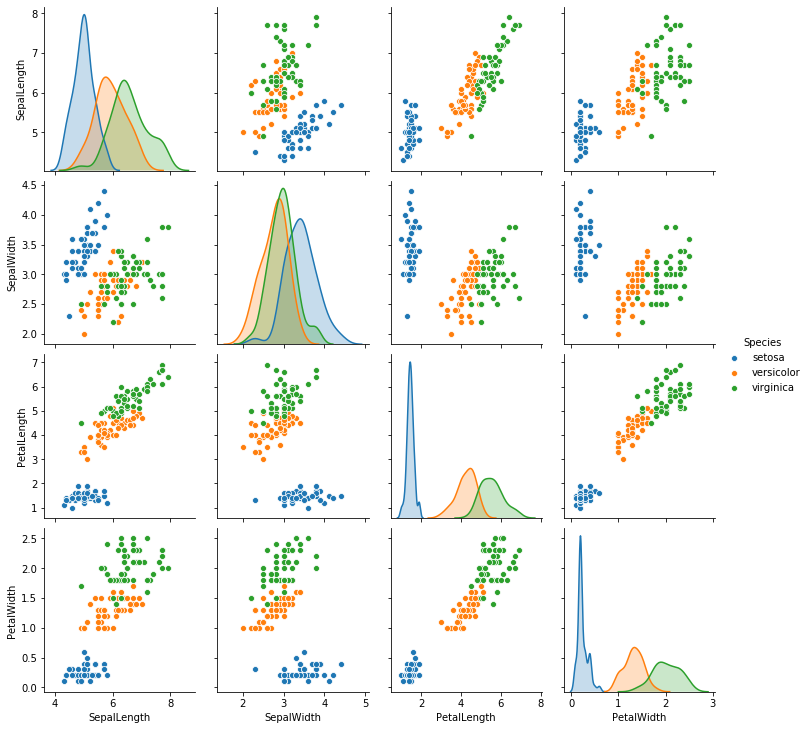

In [19]:
sns.pairplot(df, hue='Species')
plt.show()

feature importance :
[0.   0.02 0.07 0.9 ]
SepalLength:0.00
SepalWidth:0.02
PetalLength:0.07
PetalWidth:0.90


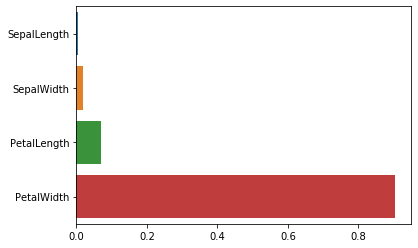

In [20]:
#feature importance로 그래프 그리기

print('feature importance :\n{0}'.format(
    np.round(model.feature_importances_, 2)))

for name, value in zip(list(X_train.columns), model.feature_importances_):

    print('{0}:{1:.2f}'.format(name, value))

sns.barplot(x=model.feature_importances_, y=list(X_train.columns))

위에서 만든 결정 트리에서 어떤 feature가 영향을 많이 혹은 적게 미쳤는지 시각화한 것이다.  
해당 feature importance의 총합은 1이다. 따라서 해당 데이터 내에서 중요도 우선순위를 정할 수 있다.  
feature의 중요도 시각화 그래프를 보면, PetalWidth가 가장 높은 중요도를 가진다.  
이것에 대한 의미는 Petal Width가 해당 분류에 있어 가장 중요한 요소로 판단이 되는 것이다.  

##  3-2 [모델 평가] Confussion Matrix


<Figure size 1080x720 with 0 Axes>

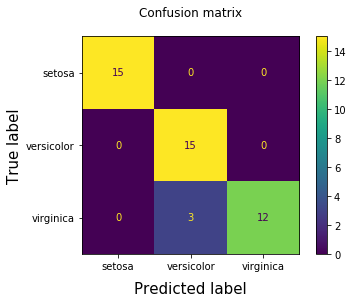

In [21]:
y_pred = model.predict(X_test)
plt.figure(figsize=(15, 10))
CM = plot_confusion_matrix(model,
                           X_test,
                           y_test,
                           labels=['setosa', 'versicolor', 'virginica'])
plt.title('Confusion matrix', pad=20)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', labelpad=10, fontsize=15)
plt.show()

##     3-3 [모델 평가] Model Evaluation


In [22]:
acc = sm.accuracy_score(y_test, y_pred)
pre = sm.precision_score(y_test, y_pred, average='micro')
rec = sm.recall_score(y_test, y_pred, average='micro')
f1 = sm.f1_score(y_test, y_pred, average='micro')

print('Accuracy :', acc, '\n'
      'Precision :', pre, '\n'
      'Recall :', rec, '\n'
      'F1-Score :', f1)

Accuracy : 0.9333333333333333 
Precision : 0.9333333333333333 
Recall : 0.9333333333333333 
F1-Score : 0.9333333333333333
